In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn import preprocessing

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline

In [2]:
from sklearn import model_selection, preprocessing, metrics, ensemble, naive_bayes, linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
#import lightgbm as lgb

#pd.options.mode.chained_assignment = None
#pd.options.display.max_columns = 999
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

from scipy.sparse import hstack
from sklearn.preprocessing import normalize

In [3]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
import matplotlib.pyplot as plt

In [4]:
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns #Visulization

from matplotlib import style;
style.use('ggplot')

In [25]:
from xgboost import XGBRegressor
from xgboost import plot_importance

In [6]:
# Read the files with the pandas dataFrame
#  pass use the '\t' delimiter as argument because it is a tab separated file to prevent parser error

df_all = pd.read_csv('df_all_processed.csv')

In [7]:
print(df_all.shape)

(213869, 13)


In [8]:
df_all = df_all.dropna(axis=0)

In [9]:
print(df_all.shape)

(213861, 13)


In [10]:
df_train, df_test = train_test_split(df_all, test_size=0.05, random_state=42) 

In [11]:
print(df_train.shape)
print(df_test.shape)

(203167, 13)
(10694, 13)


In [12]:
df_all.head(10)

,Unnamed: 0,Id,drugName,condition,review,rating,date,usefulCount,month,year,review_clean,condition_label,day
0,0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,2012-02-28,22,2,2012,tri antidepress year citalopram fluoxetin amit...,273,28
1,1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,2009-05-17,17,5,2009,son crohn diseas done well asacol no complaint...,253,17
2,2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,2017-09-29,3,9,2017,quick reduct symptom,847,29
3,3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,2017-03-05,35,3,2017,contrav combin drug use alcohol smoke opioid c...,869,5
4,4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,2015-10-22,4,10,2015,birth control one cycl read review type simila...,175,22
5,5,208087,Zyclara,Keratosis,"""4 days in on first 2 weeks. Using on arms an...",4.0,2014-07-03,13,7,2014,day first week use arm face put vaselin lip ey...,473,3
6,6,215892,Copper,Birth Control,"""I&#039;ve had the copper coil for about 3 mon...",6.0,2016-06-06,1,6,2016,copper coil month realli excit thought not tak...,175,6
7,7,169852,Amitriptyline,Migraine Prevention,"""This has been great for me. I&#039;ve been on...",9.0,2009-04-21,32,4,2009,great week last week headach went away tylenol...,522,21
8,8,23295,Methadone,Opiate Withdrawal,"""Ive been on Methadone for over ten years and ...",7.0,2016-10-18,21,10,2016,ive methadon ten year current tri get drug ive...,594,18
9,9,71428,Levora,Birth Control,"""I was on this pill for almost two years. It d...",2.0,2011-04-16,3,4,2011,pill almost two year work far not get pregnant...,175,16


### Sentiment Analysis

In [45]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\CK-
[nltk_data]     Lab\AppData\Roaming\nltk_data...


True

In [46]:
sid = SentimentIntensityAnalyzer()

In [47]:
df_all['vaderReviewScore'] = df_all['review_clean'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [48]:
df_all.head()

,Unnamed: 0,Id,drugName,condition,review,rating,date,usefulCount,month,year,review_clean,condition_label,day,vaderReviewScore
0,0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,2012-02-28,22,2,2012,tri antidepress year citalopram fluoxetin amit...,273,28,0.8470
1,1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,2009-05-17,17,5,2009,son crohn diseas done well asacol no complaint...,253,17,-0.5423
2,2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,2017-09-29,3,9,2017,quick reduct symptom,847,29,0.0000
3,3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,2017-03-05,35,3,2017,contrav combin drug use alcohol smoke opioid c...,869,5,0.5106
4,4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,2015-10-22,4,10,2015,birth control one cycl read review type simila...,175,22,0.8834


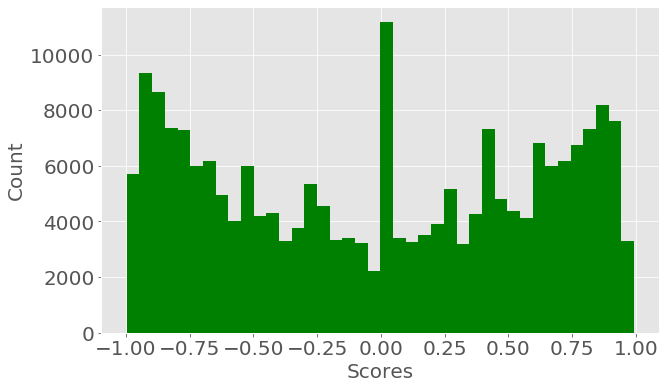

In [52]:
df_all["vaderReviewScore"].plot(kind="hist", color='green', bins=40, figsize = (10,6), fontsize = 20)
plt.xlabel('Scores', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.savefig("sentiment_analysis", bbox_inches='tight')

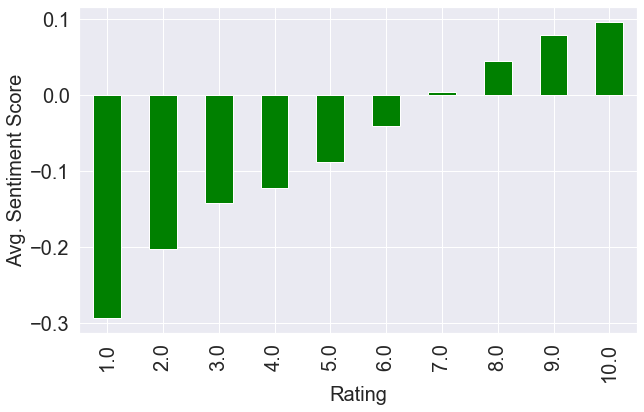

In [76]:
vaderScores = df_all.groupby('rating')['vaderReviewScore'].mean()
vaderScores.plot(kind="bar", figsize = (10,6), fontsize = 20, color="green")
plt.xlabel("Rating", fontsize = 20)
plt.ylabel("Avg. Sentiment Score", fontsize = 20)
plt.savefig("sentiment_rating", bbox_inches='tight')

### Vectorize with Count of N-gram

In [13]:
def getNgramFeatures(minNgram, maxNgram, df_train, df_test, num_features = 2000):
    vectorizer = CountVectorizer(analyzer = 'word', 
                             tokenizer = None,
                             preprocessor = None, 
                             stop_words = None, 
                             min_df = 2,
                             ngram_range = (minNgram, maxNgram),
                             max_features = num_features
                            )
    print(vectorizer)
    
    train_data_features = vectorizer.fit_transform(df_train['review_clean'])
    test_data_features = vectorizer.transform(df_test['review_clean'])
    
    return train_data_features, test_data_features, vectorizer

In [14]:
def getTFIDFFeatures(minNgram, maxNgram, df_train, df_test, num_features = 2000):
    vectorizer = TfidfVectorizer(analyzer = 'word', 
                             tokenizer = None,
                             preprocessor = None, 
                             stop_words = None, 
                             min_df = 2,
                             ngram_range = (minNgram, maxNgram),
                             max_features = num_features
                            )
    print(vectorizer)
    
    train_data_features = vectorizer.fit_transform(df_train['review_clean'])
    test_data_features = vectorizer.transform(df_test['review_clean'])
    
    return train_data_features, test_data_features, vectorizer

### Linear Regresion 

In [21]:
def getLinearRegressionResults(train_x, train_y, test_x, test_y):
    lin_reg = LinearRegression()
    
    print(lin_reg)
    
    lin_reg.fit(train_x, train_y)
    
    train_pred = lin_reg.predict(train_x)
    test_pred = lin_reg.predict(test_x)
    
    test_mse = metrics.mean_squared_error(test_y, test_pred)
    test_rmse = np.sqrt(metrics.mean_absolute_error(test_y, test_pred))
    test_r2 = metrics.r2_score(test_y, test_pred)
    
    train_mse = metrics.mean_squared_error(train_y, train_pred)
    train_rmse = np.sqrt(metrics.mean_absolute_error(train_y, train_pred))
    train_r2 = metrics.r2_score(train_y, train_pred)
    
    print("TRAIN: MSE: %f, RMSE: %f, R^2: %f" % (train_mse, train_rmse, train_r2))
    print("TEST: MSE: %f, RMSE: %f, R^2: %f" % (test_mse, test_rmse, test_r2))
    
    return lin_reg

In [16]:
def getRidgeRegressionResults(C, train_x, train_y, test_x, test_y):
    lin_reg = Ridge(alpha=C)
    
    print(lin_reg)
    
    lin_reg.fit(train_x, train_y)
    
    train_pred = lin_reg.predict(train_x)
    test_pred = lin_reg.predict(test_x)
    
    test_mse = metrics.mean_squared_error(test_y, test_pred)
    test_rmse = np.sqrt(metrics.mean_absolute_error(test_y, test_pred))
    test_r2 = metrics.r2_score(test_y, test_pred)
    
    train_mse = metrics.mean_squared_error(train_y, train_pred)
    train_rmse = np.sqrt(metrics.mean_absolute_error(train_y, train_pred))
    train_r2 = metrics.r2_score(train_y, train_pred)
    
    print("Ridge(alpha=%f)" % (C))
    print("TRAIN: MSE: %f, RMSE: %f, R^2: %f" % (train_mse, train_rmse, train_r2))
    print("TEST: MSE: %f, RMSE: %f, R^2: %f" % (test_mse, test_rmse, test_r2))

In [17]:
def getKernelRidgeRegressionResults(train_x, train_y, test_x, test_y):
    kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                              "gamma": np.logspace(-2, 2, 5)})
    
    kr.fit(train_x, train_y)
    
    train_pred = kr.predict(train_x)
    test_pred = kr.predict(test_x)
    
    test_mse = metrics.mean_squared_error(test_y, test_pred)
    test_rmse = np.sqrt(metrics.mean_absolute_error(test_y, test_pred))
    test_r2 = metrics.r2_score(test_y, test_pred)
    
    train_mse = metrics.mean_squared_error(train_y, train_pred)
    train_rmse = np.sqrt(metrics.mean_absolute_error(train_y, train_pred))
    train_r2 = metrics.r2_score(train_y, train_pred)
    
    print("TRAIN: MSE: %f, RMSE: %f, R^2: %f" % (train_mse, train_rmse, train_r2))
    print("TEST: MSE: %f, RMSE: %f, R^2: %f" % (test_mse, test_rmse, test_r2))
    
    return kr

In [17]:
def getRandomForestRegressionResults(train_x, train_y, test_x, test_y):
    rfr = RandomForestRegressor(n_estimators=10, verbose = 10, n_jobs = 4)

    rfr.fit(train_x, train_y)
    
    train_pred = rfr.predict(train_x)
    test_pred = rfr.predict(test_x)
    
    test_mse = metrics.mean_squared_error(test_y, test_pred)
    test_rmse = np.sqrt(metrics.mean_absolute_error(test_y, test_pred))
    test_r2 = metrics.r2_score(test_y, test_pred)
    
    train_mse = metrics.mean_squared_error(train_y, train_pred)
    train_rmse = np.sqrt(metrics.mean_absolute_error(train_y, train_pred))
    train_r2 = metrics.r2_score(train_y, train_pred)
    
    print("TRAIN: MSE: %f, RMSE: %f, R^2: %f" % (train_mse, train_rmse, train_r2))
    print("TEST: MSE: %f, RMSE: %f, R^2: %f" % (test_mse, test_rmse, test_r2))
    
    return rfr

In [18]:
def getXGBoostRegressionResults(train_x, train_y, test_x, test_y, n_est=50):
    
    gbr = XGBRegressor(n_estimators=n_est)

    print(gbr)
    
    gbr.fit(train_x, train_y)
    
    train_pred = gbr.predict(train_x)
    test_pred = gbr.predict(test_x)
    
    test_mse = metrics.mean_squared_error(test_y, test_pred)
    test_rmse = np.sqrt(metrics.mean_absolute_error(test_y, test_pred))
    test_r2 = metrics.r2_score(test_y, test_pred)
    
    train_mse = metrics.mean_squared_error(train_y, train_pred)
    train_rmse = np.sqrt(metrics.mean_absolute_error(train_y, train_pred))
    train_r2 = metrics.r2_score(train_y, train_pred)
    
    print("TRAIN: MSE: %f, RMSE: %f, R^2: %f" % (train_mse, train_rmse, train_r2))
    print("TEST: MSE: %f, RMSE: %f, R^2: %f" % (test_mse, test_rmse, test_r2))
    
    return gbr

### One-hot encoding month and year

In [43]:
enc = preprocessing.OneHotEncoder(categories='auto')
enc.fit(df_train[["month","year"]].to_numpy())
train_onehotlabels = enc.transform(df_train[["month","year"]].to_numpy()).toarray()
print(train_onehotlabels.shape)
test_onehotlabels = enc.transform(df_test[["month","year"]].to_numpy()).toarray()
print(test_onehotlabels.shape)

(203167, 22)
(10694, 22)


### One-hot encoding month, year, condition_label

In [64]:
enc = preprocessing.OneHotEncoder(categories='auto')
enc.fit(df_train[["month","year"]].to_numpy())
train_onehotlabels_date = enc.transform(df_train[["month","year"]].to_numpy()).toarray()
print(train_onehotlabels_date.shape)
test_onehotlabels_date = enc.transform(df_test[["month","year"]].to_numpy()).toarray()
print(test_onehotlabels_date.shape)

enc = preprocessing.OneHotEncoder(categories=[list(range(0,916))])
enc.fit(df_train[["condition_label"]].to_numpy())
train_onehotlabels_condition = enc.transform(df_train[["condition_label"]].to_numpy()).toarray()
print(train_onehotlabels_condition.shape)
test_onehotlabels_condition = enc.transform(df_test[["condition_label"]].to_numpy()).toarray()
print(test_onehotlabels_condition.shape)

train_onehotlabels = np.concatenate((train_onehotlabels_date, train_onehotlabels_condition), axis=1)
test_onehotlabels = np.concatenate((test_onehotlabels_date, test_onehotlabels_condition), axis=1)
print(train_onehotlabels.shape)
print(test_onehotlabels.shape)

(203167, 22)
(10694, 22)
(203167, 916)
(10694, 916)
(203167, 938)
(10694, 938)


### One-hot encoding month, year, day, and condition_label

In [26]:
enc = preprocessing.OneHotEncoder(categories='auto')
enc.fit(df_all[["month","year","day"]].to_numpy())
train_onehotlabels_date = enc.transform(df_train[["month","year","day"]].to_numpy()).toarray()
print(train_onehotlabels_date.shape)
test_onehotlabels_date = enc.transform(df_test[["month","year","day"]].to_numpy()).toarray()
print(test_onehotlabels_date.shape)

enc = preprocessing.OneHotEncoder(categories=[list(range(0,916))])
enc.fit(df_train[["condition_label"]].to_numpy())
train_onehotlabels_condition = enc.transform(df_train[["condition_label"]].to_numpy()).toarray()
print(train_onehotlabels_condition.shape)
test_onehotlabels_condition = enc.transform(df_test[["condition_label"]].to_numpy()).toarray()
print(test_onehotlabels_condition.shape)

train_onehotlabels = np.concatenate((train_onehotlabels_date, train_onehotlabels_condition), axis=1)
test_onehotlabels = np.concatenate((test_onehotlabels_date, test_onehotlabels_condition), axis=1)
print(train_onehotlabels.shape)
print(test_onehotlabels.shape)

(203167, 53)
(10694, 53)
(203167, 916)
(10694, 916)
(203167, 969)
(10694, 969)


### Feature Importance

In [32]:
### XGBOOST plot_importance
# Features add condition & usefulCount
# Test set 0.05
numFeatures = 5000
max_ngram = 2
min_ngram = 1
n_est = 3000

print("\nRunnpipelineing ngram(%d, %d)" % (min_ngram, max_ngram))
train_data_features, test_data_features, vc = getTFIDFFeatures(min_ngram, max_ngram, df_train, df_test, numFeatures)
print(train_data_features.shape)
print(test_data_features.shape)

train_features = hstack((train_data_features,train_onehotlabels))
test_features = hstack((test_data_features,test_onehotlabels))

print(train_features.shape)
print(test_features.shape)

train_features = hstack((train_features, np.array([df_train["usefulCount"].to_numpy()]).T))
test_features = hstack((test_features, np.array([df_test["usefulCount"].to_numpy()]).T))

print(train_features.shape)
print(test_features.shape)

xgbModel = getXGBoostRegressionResults(train_features, df_train["rating"], test_features, df_test["rating"], n_est)



Runnpipelineing ngram(1, 2)
TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=5000,
                min_df=2, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)
(203167, 5000)
(10694, 5000)
(203167, 5969)
(10694, 5969)
(203167, 5970)
(10694, 5970)
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=3000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg

/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[20:31:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


KeyboardInterrupt: 

In [ ]:
plot_importance(xgbModel, max_num_features=20)

In [22]:
# Features add condition & usefulCount
# Test set 0.05
for numFeatures in [35000]:
    for max_ngram in [2]: 
        min_ngram = 1

        print("\nRunning ngram(%d, %d)" % (min_ngram, max_ngram))
        train_data_features, test_data_features, vc = getNgramFeatures(min_ngram, max_ngram, df_train, df_test, numFeatures)
        print(train_data_features.shape)
        print(test_data_features.shape)

        train_features = hstack((train_data_features,train_onehotlabels))
        test_features = hstack((test_data_features,test_onehotlabels))
        
        print(train_features.shape)
        print(test_features.shape)

        train_features = hstack((train_features, np.array([df_train["usefulCount"].to_numpy()]).T))
        test_features = hstack((test_features, np.array([df_test["usefulCount"].to_numpy()]).T))
        
        print(train_features.shape)
        print(test_features.shape)

        model = getLinearRegressionResults(train_features, df_train["rating"], test_features, df_test["rating"])

        CoefNames = list(zip(model.coef_, vc.get_feature_names()))
        CoefNames.sort(reverse=True)
        print(CoefNames[:20])
        print(CoefNames[-20:])


Running ngram(1, 2)
CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=35000, min_df=2,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)
(203167, 35000)
(10694, 35000)
(203167, 35969)
(10694, 35969)
(203167, 35970)
(10694, 35970)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
TRAIN: MSE: 3.527218, RMSE: 1.217231, R^2: 0.671063
TEST: MSE: 5.177190, RMSE: 1.343337, R^2: 0.524129
[(4.321343364633374, 'magnesia'), (4.29843751729137, 'pump inhibitor'), (4.067326971397034, 'prostat hyperplasia'), (3.7371021141041068, 'dysphor disord'), (3.554775388160428, 'natur throid'), (3.4093453253859147, 'tri nessa'), (2.886755774105202, 'bleed complet'), (2.676074900981687, '

In [24]:
        CoefNames = list(zip(model.coef_, vc.get_feature_names()))
        CoefNames.sort(reverse=True)
        print(CoefNames[:50])
        print(CoefNames[-50:])

[(4.321343364633374, 'magnesia'), (4.29843751729137, 'pump inhibitor'), (4.067326971397034, 'prostat hyperplasia'), (3.7371021141041068, 'dysphor disord'), (3.554775388160428, 'natur throid'), (3.4093453253859147, 'tri nessa'), (2.886755774105202, 'bleed complet'), (2.676074900981687, 'ice cube'), (2.4535659436215846, 'estrin'), (2.4209459225617063, 'folic'), (2.2968470976275706, 'john wort'), (2.283192482760353, 'lens'), (2.2609399659621126, 'basket case'), (2.2092137565719456, 'energi sex'), (2.1225529538594428, 'like clock'), (2.097304422400858, 'esteem'), (2.064054422205211, 'peopl thought'), (2.0575817243235073, 'tempor'), (2.024722243572663, 'deal breaker'), (2.022677366820685, 'current dose'), (1.9844953971352732, 'last ditch'), (1.9808545884367466, 'size amount'), (1.9328754986205916, 'hive free'), (1.8980472997188569, 'game changer'), (1.8901044261174809, 'life changer'), (1.8759572990688327, 'never reaction'), (1.8354110784397963, 'alway look'), (1.8127672116791766, 'lidoderm

### Ridge

In [35]:
# Features add condition & usefulCount
# Test set 0.05
for numFeatures in [35000]:
    for max_ngram in [2]: 
        min_ngram = 1

        print("\nRunning ngram(%d, %d)" % (min_ngram, max_ngram))
        train_data_features, test_data_features, vc = getNgramFeatures(min_ngram, max_ngram, df_train, df_test, numFeatures)
        print(train_data_features.shape)
        print(test_data_features.shape)

        train_features = hstack((train_data_features,train_onehotlabels))
        test_features = hstack((test_data_features,test_onehotlabels))
        
        print(train_features.shape)
        print(test_features.shape)

        train_features = hstack((train_features, np.array([df_train["usefulCount"].to_numpy()]).T))
        test_features = hstack((test_features, np.array([df_test["usefulCount"].to_numpy()]).T))
        
        print(train_features.shape)
        print(test_features.shape)

        #model = getLinearRegressionResults(train_features, df_train["rating"], test_features, df_test["rating"])

        for c in [0.01, 0.05, 0.1, 0.5, 1, 10, 100]:
            getRidgeRegressionResults(c, train_features, df_train["rating"], test_features, df_test["rating"])

#         CoefNames = list(zip(model.coef_, vc.get_feature_names()))
#         CoefNames.sort(reverse=True)
#         print(CoefNames[:10])
#         print(CoefNames[-10:])


Running ngram(1, 2)
CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=35000, min_df=2,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)
(203167, 35000)
(10694, 35000)
(203167, 35969)
(10694, 35969)
(203167, 35970)
(10694, 35970)
Ridge(alpha=0.010000)
TRAIN: MSE: 5.780887, RMSE: 1.395481, R^2: 0.460894
TEST: MSE: 5.894450, RMSE: 1.402386, R^2: 0.458201
Ridge(alpha=0.050000)
TRAIN: MSE: 5.780875, RMSE: 1.395481, R^2: 0.460895
TEST: MSE: 5.894444, RMSE: 1.402386, R^2: 0.458202
Ridge(alpha=0.100000)
TRAIN: MSE: 5.780874, RMSE: 1.395480, R^2: 0.460895
TEST: MSE: 5.894439, RMSE: 1.402386, R^2: 0.458202
Ridge(alpha=0.500000)
TRAIN: MSE: 5.780931, RMSE: 1.395486, R^2: 0.460890
TEST: MSE: 5.894484, 

In [20]:
# Features add condition & usefulCount
# Test set 0.05
for numFeatures in [35000]:
    for max_ngram in [2]: 
        min_ngram = 1

        print("\nRunning ngram(%d, %d)" % (min_ngram, max_ngram))
        train_data_features, test_data_features, vc = getTFIDFFeatures(min_ngram, max_ngram, df_train, df_test, numFeatures)
        print(train_data_features.shape)
        print(test_data_features.shape)

        train_features = hstack((train_data_features,train_onehotlabels))
        test_features = hstack((test_data_features,test_onehotlabels))
        
        print(train_features.shape)
        print(test_features.shape)

        train_features = hstack((train_features, np.array([df_train["usefulCount"].to_numpy()]).T))
        test_features = hstack((test_features, np.array([df_test["usefulCount"].to_numpy()]).T))
        
        print(train_features.shape)
        print(test_features.shape)

        getLinearRegressionResults(train_features, df_train["rating"], test_features, df_test["rating"])

        for c in [0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 100, 1000]:
            getRidgeRegressionResults(c, train_features, df_train["rating"], test_features, df_test["rating"])

#         CoefNames = list(zip(model.coef_, vc.get_feature_names()))
#         CoefNames.sort(reverse=True)
#         print(CoefNames[:10])
#         print(CoefNames[-10:])


Running ngram(1, 2)
TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=35000,
                min_df=2, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)
(203167, 35000)
(10694, 35000)
(203167, 35969)
(10694, 35969)
(203167, 35970)
(10694, 35970)
TRAIN: MSE: 3.104866, RMSE: 1.176297, R^2: 0.710450
TEST: MSE: 4.650286, RMSE: 1.302979, R^2: 0.572561
Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
Ridge(alpha=0.000000)
TRAIN: MSE: 8.842596, RMSE: 1.582652, R^2: 0.175369
TEST: MSE: 9.046916, RMSE: 1.592696, R^2: 0.168436
Ridge(alpha=0.001, copy_X=True,

### Different N-grams

In [36]:
min_ngram = 1
max_ngram = 1
print("\nRunning ngram(%d, %d)" % (min_ngram, max_ngram))
train_data_features, test_data_features, vc = getNgramFeatures(min_ngram, max_ngram, df_train, df_test)
print(train_data_features.shape)
print(test_data_features.shape)

train_features = hstack((train_data_features,train_onehotlabels))
test_features = hstack((test_data_features,test_onehotlabels))

print(train_features.shape)
print(test_features.shape)

model = getLinearRegressionResults(train_features, df_train["rating"], test_features, df_test["rating"])

#for c in [0.01, 0.1, 1, 10, 100, 1000]:
#    getRidgeRegressionResults(c, train_features, df_train["rating"], test_features, df_test["rating"])
    
CoefNames = list(zip(model.coef_, vc.get_feature_names()))
CoefNames.sort(reverse=True)
print(CoefNames[:10])
print(CoefNames[-10:])


Running ngram(1, 1)
CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=2000, min_df=2,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)
(164672, 2000)
(49189, 2000)
(164672, 2022)
(49189, 2022)
TRAIN: MSE: 6.247339, RMSE: 1.423504, R^2: 0.417359
TEST: MSE: 6.377374, RMSE: 1.431346, R^2: 0.407286
[(1.2548377333671896, 'godsend'), (1.2270401652472538, 'lifesav'), (1.1898683943322512, 'unprotect'), (1.1801398060339165, 'miracl'), (1.173132512404964, 'excel'), (1.1246286174665407, 'charm'), (1.117680167322056, 'changer'), (1.0778325362321668, 'saver'), (1.0089482726482586, 'amaz'), (0.9794313679144251, 'fantast')]
[(-1.016651838474159, 'discontinu'), (-1.0384430550800337, 'asap'), (-1.1053822867

In [37]:
## test set 0.23
for numFeatures in [2000,5000,10000,20000,30000]:
    for max_ngram in [2,3]:    
        min_ngram = 1

        print("\nRunning ngram(%d, %d)" % (min_ngram, max_ngram))
        train_data_features, test_data_features, vc = getNgramFeatures(min_ngram, max_ngram, df_train, df_test, numFeatures)
        print(train_data_features.shape)
        print(test_data_features.shape)

        train_features = hstack((train_data_features,train_onehotlabels))
        test_features = hstack((test_data_features,test_onehotlabels))

        print(train_features.shape)
        print(test_features.shape)

        model = getLinearRegressionResults(train_features, df_train["rating"], test_features, df_test["rating"])

        #for c in [0.01, 0.1, 1, 10, 100, 1000]:
        #    getRidgeRegressionResults(c, train_features, df_train["rating"], test_features, df_test["rating"])

        CoefNames = list(zip(model.coef_, vc.get_feature_names()))
        CoefNames.sort(reverse=True)
        print(CoefNames[:10])
        print(CoefNames[-10:])


Running ngram(1, 2)
CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=2000, min_df=2,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)
(164672, 2000)
(49189, 2000)
(164672, 2022)
(49189, 2022)
TRAIN: MSE: 5.983772, RMSE: 1.406381, R^2: 0.441940
TEST: MSE: 6.103440, RMSE: 1.414071, R^2: 0.432745
[(1.2061842240678777, 'excel'), (1.1764769513865894, 'chang life'), (1.0169398565104273, 'miracl'), (0.9769062887915049, 'fantast'), (0.9574720704956541, 'amaz'), (0.9507365439870675, 'high recommend'), (0.9353259416462608, 'life saver'), (0.9320162077147068, 'awesom'), (0.9037079305303402, 'grate'), (0.889025505156692, 'best')]
[(-0.9997113788270053, 'yeast infect'), (-1.0754547038443087, 'ruin'), (

In [44]:
# Test set 0.05
for numFeatures in [2000,5000,10000,20000,25000,30000]:
    max_ngram = 2    
    min_ngram = 1

    print("\nRunning ngram(%d, %d)" % (min_ngram, max_ngram))
    train_data_features, test_data_features, vc = getNgramFeatures(min_ngram, max_ngram, df_train, df_test, numFeatures)
    print(train_data_features.shape)
    print(test_data_features.shape)

    train_features = hstack((train_data_features,train_onehotlabels))
    test_features = hstack((test_data_features,test_onehotlabels))

    print(train_features.shape)
    print(test_features.shape)

    model = getLinearRegressionResults(train_features, df_train["rating"], test_features, df_test["rating"])

    #for c in [0.01, 0.1, 1, 10, 100, 1000]:
    #    getRidgeRegressionResults(c, train_features, df_train["rating"], test_features, df_test["rating"])

    CoefNames = list(zip(model.coef_, vc.get_feature_names()))
    CoefNames.sort(reverse=True)
    print(CoefNames[:10])
    print(CoefNames[-10:])


Running ngram(1, 2)
CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=2000, min_df=2,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)
(203167, 2000)
(10694, 2000)
(203167, 2022)
(10694, 2022)
TRAIN: MSE: 5.978909, RMSE: 1.406415, R^2: 0.442427
TEST: MSE: 6.099793, RMSE: 1.412417, R^2: 0.439327
[(1.235084766068817, 'lifesav'), (1.2242960264942118, 'excel'), (1.1875093267807746, 'chang life'), (1.1136560939600213, 'life saver'), (1.0368774516656638, 'miracl'), (1.0026266972024114, 'fantast'), (0.9495318666355569, 'amaz'), (0.9433275448639252, 'high recommend'), (0.9217980440952729, 'grate'), (0.9182887934915263, 'awesom')]
[(-1.0435589077790952, 'ruin'), (-1.1762363565866425, 'not help'), (-

In [45]:
# Test set 0.05
for numFeatures in [35000, 40000]:
    max_ngram = 2    
    min_ngram = 1

    print("\nRunning ngram(%d, %d)" % (min_ngram, max_ngram))
    train_data_features, test_data_features, vc = getNgramFeatures(min_ngram, max_ngram, df_train, df_test, numFeatures)
    print(train_data_features.shape)
    print(test_data_features.shape)

    train_features = hstack((train_data_features,train_onehotlabels))
    test_features = hstack((test_data_features,test_onehotlabels))

    print(train_features.shape)
    print(test_features.shape)

    model = getLinearRegressionResults(train_features, df_train["rating"], test_features, df_test["rating"])

    #for c in [0.01, 0.1, 1, 10, 100, 1000]:
    #    getRidgeRegressionResults(c, train_features, df_train["rating"], test_features, df_test["rating"])

    CoefNames = list(zip(model.coef_, vc.get_feature_names()))
    CoefNames.sort(reverse=True)
    print(CoefNames[:10])
    print(CoefNames[-10:])


Running ngram(1, 2)
CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=35000, min_df=2,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)
(203167, 35000)
(10694, 35000)
(203167, 35022)
(10694, 35022)
TRAIN: MSE: 3.668728, RMSE: 1.231257, R^2: 0.657867
TEST: MSE: 5.278440, RMSE: 1.351960, R^2: 0.514823
[(4.414736728082629, 'pump inhibitor'), (4.319087207076994, 'prostat hyperplasia'), (4.127861036753822, 'natur throid'), (4.099887717949005, 'magnesia'), (3.4834169187590667, 'dysphor disord'), (3.390686534289931, 'tri nessa'), (3.033328362171943, 'bleed complet'), (2.8121862856093593, 'ice cube'), (2.5335598534432777, 'estrin'), (2.4484896835399255, 'folic')]
[(-2.648485279927639, 'premenstru d

In [81]:
# Features add condition & usefulCount
# Test set 0.05
for numFeatures in [20000, 25000, 30000, 35000, 40000]:
    for max_ngram in [2, 3]: 
        min_ngram = 1

        print("\nRunning ngram(%d, %d)" % (min_ngram, max_ngram))
        train_data_features, test_data_features, vc = getNgramFeatures(min_ngram, max_ngram, df_train, df_test, numFeatures)
        print(train_data_features.shape)
        print(test_data_features.shape)

        train_features = hstack((train_data_features,train_onehotlabels))
        test_features = hstack((test_data_features,test_onehotlabels))
        
        print(train_features.shape)
        print(test_features.shape)

        train_features = hstack((train_features, np.array([df_train["usefulCount"].to_numpy()]).T))
        test_features = hstack((test_features, np.array([df_test["usefulCount"].to_numpy()]).T))
        
        print(train_features.shape)
        print(test_features.shape)

        model = getLinearRegressionResults(train_features, df_train["rating"], test_features, df_test["rating"])

        #for c in [0.01, 0.1, 1, 10, 100, 1000]:
        #    getRidgeRegressionResults(c, train_features, df_train["rating"], test_features, df_test["rating"])

        CoefNames = list(zip(model.coef_, vc.get_feature_names()))
        CoefNames.sort(reverse=True)
        print(CoefNames[:10])
        print(CoefNames[-10:])


Running ngram(1, 2)
CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=20000, min_df=2,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)
(203167, 20000)
(10694, 20000)
(203167, 20938)
(10694, 20938)
(203167, 20939)
(10694, 20939)
TRAIN: MSE: 4.251992, RMSE: 1.280461, R^2: 0.603473
TEST: MSE: 5.220429, RMSE: 1.350555, R^2: 0.520155
[(3.7619246016471086, 'natur throid'), (3.7480817745744566, 'magnesia'), (3.54288436369591, 'prostat hyperplasia'), (2.8896377464974377, 'uric'), (2.669328112506924, 'sclerosi'), (2.5225885049752437, 'like clock'), (2.2165448801741694, 'suicid ideat'), (1.7902040425410233, 'john wort'), (1.637034289539028, 'guinea'), (1.6235346855424135, 'ortho cyclen')]
[(-2.28484

### TFIDF

In [83]:
# Features add condition & usefulCount
# Test set 0.05
for numFeatures in [20000, 25000, 30000, 35000, 40000]:
    for max_ngram in [2, 3]: 
        min_ngram = 1

        print("\nRunning ngram(%d, %d)" % (min_ngram, max_ngram))
        train_data_features, test_data_features, vc = getTFIDFFeatures(min_ngram, max_ngram, df_train, df_test, numFeatures)
        print(train_data_features.shape)
        print(test_data_features.shape)

        train_features = hstack((train_data_features,train_onehotlabels))
        test_features = hstack((test_data_features,test_onehotlabels))
        
        print(train_features.shape)
        print(test_features.shape)

        train_features = hstack((train_features, np.array([df_train["usefulCount"].to_numpy()]).T))
        test_features = hstack((test_features, np.array([df_test["usefulCount"].to_numpy()]).T))
        
        print(train_features.shape)
        print(test_features.shape)

        model = getLinearRegressionResults(train_features, df_train["rating"], test_features, df_test["rating"])

        #for c in [0.01, 0.1, 1, 10, 100, 1000]:
        #    getRidgeRegressionResults(c, train_features, df_train["rating"], test_features, df_test["rating"])

        CoefNames = list(zip(model.coef_, vc.get_feature_names()))
        CoefNames.sort(reverse=True)
        print(CoefNames[:10])
        print(CoefNames[-10:])


Running ngram(1, 2)
TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=20000,
                min_df=2, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)
(203167, 20000)
(10694, 20000)
(203167, 20938)
(10694, 20938)
(203167, 20939)
(10694, 20939)
TRAIN: MSE: 3.800098, RMSE: 1.238629, R^2: 0.645615
TEST: MSE: 4.733297, RMSE: 1.309550, R^2: 0.564930
[(17.041855943532195, 'magnesia'), (16.343852993657823, 'natur throid'), (16.2912740065747, 'prostat hyperplasia'), (13.700268058172043, 'uric'), (13.279316863605814, 'sclerosi'), (12.212045890461622, 'john wort'), (11.966774549857664, 'suicid ideat'), (10.800236319740362, 'like clock')

In [85]:
# Features add condition & usefulCount
# Test set 0.05
for numFeatures in [45000, 50000]:
    for max_ngram in [2, 3]: 
        min_ngram = 1

        print("\nRunning ngram(%d, %d)" % (min_ngram, max_ngram))
        train_data_features, test_data_features, vc = getTFIDFFeatures(min_ngram, max_ngram, df_train, df_test, numFeatures)
        print(train_data_features.shape)
        print(test_data_features.shape)

        train_features = hstack((train_data_features,train_onehotlabels))
        test_features = hstack((test_data_features,test_onehotlabels))
        
        print(train_features.shape)
        print(test_features.shape)

        train_features = hstack((train_features, np.array([df_train["usefulCount"].to_numpy()]).T))
        test_features = hstack((test_features, np.array([df_test["usefulCount"].to_numpy()]).T))
        
        print(train_features.shape)
        print(test_features.shape)

        model = getLinearRegressionResults(train_features, df_train["rating"], test_features, df_test["rating"])

        #for c in [0.01, 0.1, 1, 10, 100, 1000]:
        #    getRidgeRegressionResults(c, train_features, df_train["rating"], test_features, df_test["rating"])

        CoefNames = list(zip(model.coef_, vc.get_feature_names()))
        CoefNames.sort(reverse=True)
        print(CoefNames[:10])
        print(CoefNames[-10:])


Running ngram(1, 2)
TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=45000,
                min_df=2, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)
(203167, 45000)
(10694, 45000)
(203167, 45938)
(10694, 45938)
(203167, 45939)
(10694, 45939)
TRAIN: MSE: 2.706859, RMSE: 1.135828, R^2: 0.747567
TEST: MSE: 4.622013, RMSE: 1.295699, R^2: 0.575159
[(20.007228278080127, 'lo ovral'), (19.33342615906267, 'ice cube'), (18.160461697092586, 'esteem'), (18.0167069172588, 'folic'), (17.58641195356672, 'marrow'), (17.15886449831159, 'actin'), (16.20456691834221, 'bleed complet'), (16.092832401837764, 'natur throid'), (15.231300868639957, 

### TFIDF+one hot encoding day

In [102]:
# Features add condition & usefulCount
# Test set 0.05
for numFeatures in [5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000]:
    for max_ngram in [2, 3]: 
        min_ngram = 1

        print("\nRunnpipelineing ngram(%d, %d)" % (min_ngram, max_ngram))
        train_data_features, test_data_features, vc = getTFIDFFeatures(min_ngram, max_ngram, df_train, df_test, numFeatures)
        print(train_data_features.shape)
        print(test_data_features.shape)

        train_features = hstack((train_data_features,train_onehotlabels))
        test_features = hstack((test_data_features,test_onehotlabels))
        
        print(train_features.shape)
        print(test_features.shape)

        train_features = hstack((train_features, np.array([df_train["usefulCount"].to_numpy()]).T))
        test_features = hstack((test_features, np.array([df_test["usefulCount"].to_numpy()]).T))
        
        print(train_features.shape)
        print(test_features.shape)

        model = getLinearRegressionResults(train_features, df_train["rating"], test_features, df_test["rating"])

        #for c in [0.01, 0.1, 1, 10, 100, 1000]:
        #    getRidgeRegressionResults(c, train_features, df_train["rating"], test_features, df_test["rating"])

        CoefNames = list(zip(model.coef_, vc.get_feature_names()))
        CoefNames.sort(reverse=True)
        print(CoefNames[:10])
        print(CoefNames[-10:])


Running ngram(1, 2)
TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=5000,
                min_df=2, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)
(203167, 5000)
(10694, 5000)
(203167, 5969)
(10694, 5969)
(203167, 5970)
(10694, 5970)
TRAIN: MSE: 4.798531, RMSE: 1.315625, R^2: 0.552505
TEST: MSE: 5.099312, RMSE: 1.336249, R^2: 0.531287
[(7.648904199313731, 'esteem'), (5.901966738655186, 'rheumatoid'), (5.808010165308835, 'amaz'), (5.760173638080042, 'gotten pregnant'), (5.7211711333367825, 'godsend'), (5.637135089930472, 'bi polar'), (5.576794899090913, 'chang life'), (5.529374242229754, 'high recommend'), (5.442312270797019

In [ ]:
# Features add condition & usefulCount
# Test set 0.05
#for numFeatures in [5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000]:
for numFeatures in [5000]:
    for max_ngram in [2, 3]: 
        min_ngram = 1

        print("\nRunnpipelineing ngram(%d, %d)" % (min_ngram, max_ngram))
        train_data_features, test_data_features, vc = getTFIDFFeatures(min_ngram, max_ngram, df_train, df_test, numFeatures)
        print(train_data_features.shape)
        print(test_data_features.shape)

        train_features = hstack((train_data_features,train_onehotlabels))
        test_features = hstack((test_data_features,test_onehotlabels))
        
        print(train_features.shape)
        print(test_features.shape)

        train_features = hstack((train_features, np.array([df_train["usefulCount"].to_numpy()]).T))
        test_features = hstack((test_features, np.array([df_test["usefulCount"].to_numpy()]).T))
        
        print(train_features.shape)
        print(test_features.shape)

        model = getKernelRidgeRegressionResults(train_features, df_train["rating"], test_features, df_test["rating"])

        #for c in [0.01, 0.1, 1, 10, 100, 1000]:
        #    getRidgeRegressionResults(c, train_features, df_train["rating"], test_features, df_test["rating"])

        CoefNames = list(zip(model.coef_, vc.get_feature_names()))
        CoefNames.sort(reverse=True)
        print(CoefNames[:10])
        print(CoefNames[-10:])


Runnpipelineing ngram(1, 2)
TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=5000,
                min_df=2, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)
(203167, 5000)
(10694, 5000)
(203167, 5969)
(10694, 5969)
(203167, 5970)
(10694, 5970)


### Random Forest

In [22]:
# Features add condition & usefulCount
# Test set 0.05
#for numFeatures in [5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000]:
numFeatures = 500
max_ngram = 2 
min_ngram = 1

print("\nRunnpipelineing ngram(%d, %d)" % (min_ngram, max_ngram))
train_data_features, test_data_features, vc = getTFIDFFeatures(min_ngram, max_ngram, df_train, df_test, numFeatures)
print(train_data_features.shape)
print(test_data_features.shape)

train_features = hstack((train_data_features,train_onehotlabels))
test_features = hstack((test_data_features,test_onehotlabels))

print(train_features.shape)
print(test_features.shape)

train_features = hstack((train_features, np.array([df_train["usefulCount"].to_numpy()]).T))
test_features = hstack((test_features, np.array([df_test["usefulCount"].to_numpy()]).T))

print(train_features.shape)
print(test_features.shape)

model = getRandomForestRegressionResults(train_features, df_train["rating"], test_features, df_test["rating"])

# CoefNames = list(zip(model.coef_, vc.get_feature_names()))
# CoefNames.sort(reverse=True)
# print(CoefNames[:10])
# print(CoefNames[-10:])


Runnpipelineing ngram(1, 2)
TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=500,
                min_df=2, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)
(203167, 500)
(10694, 500)
(203167, 1469)
(10694, 1469)
(203167, 1470)
(10694, 1470)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10


[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed: 16.2min remaining: 16.2min


building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed: 16.4min remaining:  7.0min
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed: 22.1min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


TRAIN: MSE: 0.568944, RMSE: 0.670003, R^2: 0.946942
TEST: MSE: 2.893627, RMSE: 1.069079, R^2: 0.734027


In [24]:
len(model.feature_importances_)

1470

In [25]:
CoefNames = list(zip(model.feature_importances_, vc.get_feature_names()))
CoefNames.sort(reverse=True)
print(CoefNames[:10])
print(CoefNames[-10:])

[(0.019389610897413312, 'wors'), (0.01656369484349604, 'love'), (0.016437302846474967, 'worst'), (0.016061934535862334, 'year'), (0.015420555612333806, 'not'), (0.014256552077432556, 'work'), (0.011685724652846523, 'great'), (0.011602785057188005, 'horribl'), (0.009130537364206864, 'best'), (0.008904020922999096, 'stop')]
[(0.00027854417929121554, 'occasion'), (0.00027561761362450497, 'doctor prescrib'), (0.00026836803097430277, 'feel better'), (0.00026745938968473874, 'implant'), (0.00025582510241682345, 'honest'), (0.00025181992064656503, 'twice day'), (0.00025131551188566835, 'went away'), (0.00022672938287608804, 'crave'), (0.00022491396187258322, 'huge'), (0.0002028322144858673, 'dri mouth')]


In [28]:
type(vc.get_feature_names())

list

### XGBOOST

In [27]:
# Features add condition & usefulCount
# Test set 0.05
#for numFeatures in [5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000]:
numFeatures = 2000
max_ngram = 2 
min_ngram = 1

print("\nRunnpipelineing ngram(%d, %d)" % (min_ngram, max_ngram))
train_data_features, test_data_features, vc = getTFIDFFeatures(min_ngram, max_ngram, df_train, df_test, numFeatures)
print(train_data_features.shape)
print(test_data_features.shape)

train_features = hstack((train_data_features,train_onehotlabels))
test_features = hstack((test_data_features,test_onehotlabels))

print(train_features.shape)
print(test_features.shape)

train_features = hstack((train_features, np.array([df_train["usefulCount"].to_numpy()]).T))
test_features = hstack((test_features, np.array([df_test["usefulCount"].to_numpy()]).T))

print(train_features.shape)
print(test_features.shape)

model = getXGBoostRegressionResults(train_features, df_train["rating"], test_features, df_test["rating"])

# CoefNames = list(zip(model.coef_, vc.get_feature_names()))
# CoefNames.sort(reverse=True)
# print(CoefNames[:10])
# print(CoefNames[-10:])


Runnpipelineing ngram(1, 2)
TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=2000,
                min_df=2, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)
(203167, 2000)
(10694, 2000)
(203167, 2969)
(10694, 2969)
(203167, 2970)
(10694, 2970)


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[21:22:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: MSE: 8.011926, RMSE: 1.541510, R^2: 0.252834
TEST: MSE: 8.135903, RMSE: 1.547289, R^2: 0.252174


In [28]:
# Features add condition & usefulCount
# Test set 0.05
for numFeatures in [5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000]:
    max_ngram = 2 
    min_ngram = 1

    print("\nRunnpipelineing ngram(%d, %d)" % (min_ngram, max_ngram))
    train_data_features, test_data_features, vc = getTFIDFFeatures(min_ngram, max_ngram, df_train, df_test, numFeatures)
    print(train_data_features.shape)
    print(test_data_features.shape)

    train_features = hstack((train_data_features,train_onehotlabels))
    test_features = hstack((test_data_features,test_onehotlabels))

    print(train_features.shape)
    print(test_features.shape)

    train_features = hstack((train_features, np.array([df_train["usefulCount"].to_numpy()]).T))
    test_features = hstack((test_features, np.array([df_test["usefulCount"].to_numpy()]).T))

    print(train_features.shape)
    print(test_features.shape)

    model = getXGBoostRegressionResults(train_features, df_train["rating"], test_features, df_test["rating"])

    # CoefNames = list(zip(model.coef_, vc.get_feature_names()))
    # CoefNames.sort(reverse=True)
    # print(CoefNames[:10])
    # print(CoefNames[-10:])


Runnpipelineing ngram(1, 2)
TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=5000,
                min_df=2, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)
(203167, 5000)
(10694, 5000)
(203167, 5969)
(10694, 5969)
(203167, 5970)
(10694, 5970)


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[21:30:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: MSE: 8.016570, RMSE: 1.541376, R^2: 0.252401
TEST: MSE: 8.149468, RMSE: 1.547166, R^2: 0.250927

Runnpipelineing ngram(1, 2)
TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=10000,
                min_df=2, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)
(203167, 10000)
(10694, 10000)
(203167, 10969)
(10694, 10969)
(203167, 10970)
(10694, 10970)


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[21:32:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: MSE: 8.018871, RMSE: 1.541691, R^2: 0.252187
TEST: MSE: 8.161489, RMSE: 1.548347, R^2: 0.249822

Runnpipelineing ngram(1, 2)
TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=15000,
                min_df=2, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)
(203167, 15000)
(10694, 15000)
(203167, 15969)
(10694, 15969)
(203167, 15970)
(10694, 15970)


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[21:35:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: MSE: 8.015161, RMSE: 1.541905, R^2: 0.252533
TEST: MSE: 8.158932, RMSE: 1.548197, R^2: 0.250057

Runnpipelineing ngram(1, 2)
TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=20000,
                min_df=2, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)
(203167, 20000)
(10694, 20000)
(203167, 20969)
(10694, 20969)
(203167, 20970)
(10694, 20970)


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[21:38:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: MSE: 8.019862, RMSE: 1.542125, R^2: 0.252094
TEST: MSE: 8.151239, RMSE: 1.548164, R^2: 0.250764

Runnpipelineing ngram(1, 2)
TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=25000,
                min_df=2, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)
(203167, 25000)
(10694, 25000)
(203167, 25969)
(10694, 25969)
(203167, 25970)
(10694, 25970)


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[21:41:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: MSE: 8.038325, RMSE: 1.542869, R^2: 0.250372
TEST: MSE: 8.171974, RMSE: 1.548851, R^2: 0.248858

Runnpipelineing ngram(1, 2)
TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=30000,
                min_df=2, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)
(203167, 30000)
(10694, 30000)
(203167, 30969)
(10694, 30969)
(203167, 30970)
(10694, 30970)


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[21:44:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: MSE: 8.013873, RMSE: 1.541795, R^2: 0.252653
TEST: MSE: 8.147023, RMSE: 1.547758, R^2: 0.251152

Runnpipelineing ngram(1, 2)
TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=35000,
                min_df=2, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)
(203167, 35000)
(10694, 35000)
(203167, 35969)
(10694, 35969)
(203167, 35970)
(10694, 35970)


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[21:47:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: MSE: 8.020133, RMSE: 1.541757, R^2: 0.252069
TEST: MSE: 8.160714, RMSE: 1.548115, R^2: 0.249893

Runnpipelineing ngram(1, 2)
TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=40000,
                min_df=2, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)
(203167, 40000)
(10694, 40000)
(203167, 40969)
(10694, 40969)
(203167, 40970)
(10694, 40970)


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[21:50:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


KeyboardInterrupt: 

In [30]:
# Features add condition & usefulCount
# Test set 0.05
for numFeatures in [5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000]:
    max_ngram = 2 
    min_ngram = 1

    print("\nRunnpipelineing ngram(%d, %d)" % (min_ngram, max_ngram))
    train_data_features, test_data_features, vc = getTFIDFFeatures(min_ngram, max_ngram, df_train, df_test, numFeatures)
    print(train_data_features.shape)
    print(test_data_features.shape)

    train_features = hstack((train_data_features,train_onehotlabels))
    test_features = hstack((test_data_features,test_onehotlabels))

    print(train_features.shape)
    print(test_features.shape)

    train_features = hstack((train_features, np.array([df_train["usefulCount"].to_numpy()]).T))
    test_features = hstack((test_features, np.array([df_test["usefulCount"].to_numpy()]).T))

    print(train_features.shape)
    print(test_features.shape)

    for n_est in [100,150,200,500]:
        model = getXGBoostRegressionResults(train_features, df_train["rating"], test_features, df_test["rating"], n_est)

    # CoefNames = list(zip(model.coef_, vc.get_feature_names()))
    # CoefNames.sort(reverse=True)
    # print(CoefNames[:10])
    # print(CoefNames[-10:])


Runnpipelineing ngram(1, 2)
TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=5000,
                min_df=2, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)
(203167, 5000)
(10694, 5000)
(203167, 5969)
(10694, 5969)
(203167, 5970)
(10694, 5970)


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[21:54:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: MSE: 7.288851, RMSE: 1.492533, R^2: 0.320266
TEST: MSE: 7.403891, RMSE: 1.496920, R^2: 0.319458


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[21:58:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: MSE: 6.866210, RMSE: 1.464892, R^2: 0.359680
TEST: MSE: 6.971095, RMSE: 1.468851, R^2: 0.359239


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[22:03:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: MSE: 6.564069, RMSE: 1.444482, R^2: 0.387857
TEST: MSE: 6.671246, RMSE: 1.448726, R^2: 0.386800


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[22:10:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: MSE: 5.668437, RMSE: 1.382065, R^2: 0.471380
TEST: MSE: 5.834782, RMSE: 1.391043, R^2: 0.463685

Runnpipelineing ngram(1, 2)
TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=10000,
                min_df=2, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)


KeyboardInterrupt: 

In [31]:
# Features add condition & usefulCount
# Test set 0.05
for numFeatures in [5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000]:
    max_ngram = 2 
    min_ngram = 1

    print("\nRunnpipelineing ngram(%d, %d)" % (min_ngram, max_ngram))
    train_data_features, test_data_features, vc = getTFIDFFeatures(min_ngram, max_ngram, df_train, df_test, numFeatures)
    print(train_data_features.shape)
    print(test_data_features.shape)

    train_features = hstack((train_data_features,train_onehotlabels))
    test_features = hstack((test_data_features,test_onehotlabels))

    print(train_features.shape)
    print(test_features.shape)

    train_features = hstack((train_features, np.array([df_train["usefulCount"].to_numpy()]).T))
    test_features = hstack((test_features, np.array([df_test["usefulCount"].to_numpy()]).T))

    print(train_features.shape)
    print(test_features.shape)

    for n_est in [100,150,200,500,750,1000,1500]:
        model = getXGBoostRegressionResults(train_features, df_train["rating"], test_features, df_test["rating"], n_est)

    # CoefNames = list(zip(model.coef_, vc.get_feature_names()))
    # CoefNames.sort(reverse=True)
    # print(CoefNames[:10])
    # print(CoefNames[-10:])


Runnpipelineing ngram(1, 2)
TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=5000,
                min_df=2, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)
(203167, 5000)
(10694, 5000)
(203167, 5969)
(10694, 5969)
(203167, 5970)
(10694, 5970)


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[22:29:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: MSE: 7.288851, RMSE: 1.492533, R^2: 0.320266
TEST: MSE: 7.403891, RMSE: 1.496920, R^2: 0.319458


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[22:33:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: MSE: 6.866210, RMSE: 1.464892, R^2: 0.359680
TEST: MSE: 6.971095, RMSE: 1.468851, R^2: 0.359239


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[22:38:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: MSE: 6.564069, RMSE: 1.444482, R^2: 0.387857
TEST: MSE: 6.671246, RMSE: 1.448726, R^2: 0.386800


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[22:46:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: MSE: 5.668437, RMSE: 1.382065, R^2: 0.471380
TEST: MSE: 5.834782, RMSE: 1.391043, R^2: 0.463685


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[23:02:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: MSE: 5.291862, RMSE: 1.354844, R^2: 0.506499
TEST: MSE: 5.531615, RMSE: 1.368487, R^2: 0.491552


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[23:29:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: MSE: 5.032234, RMSE: 1.336099, R^2: 0.530711
TEST: MSE: 5.339009, RMSE: 1.353865, R^2: 0.509255


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[00:02:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: MSE: 4.656900, RMSE: 1.308679, R^2: 0.565713
TEST: MSE: 5.076472, RMSE: 1.334271, R^2: 0.533387

Runnpipelineing ngram(1, 2)
TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=10000,
                min_df=2, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)
(203167, 10000)
(10694, 10000)
(203167, 10969)
(10694, 10969)
(203167, 10970)
(10694, 10970)


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[00:46:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: MSE: 7.283223, RMSE: 1.492719, R^2: 0.320791
TEST: MSE: 7.404310, RMSE: 1.497977, R^2: 0.319419


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[00:48:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: MSE: 6.854774, RMSE: 1.464515, R^2: 0.360747
TEST: MSE: 6.967937, RMSE: 1.469655, R^2: 0.359530


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[00:52:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: MSE: 6.559391, RMSE: 1.444916, R^2: 0.388293
TEST: MSE: 6.672158, RMSE: 1.449961, R^2: 0.386716


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[00:58:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


KeyboardInterrupt: 

In [32]:
# Features add condition & usefulCount
# Test set 0.05
for numFeatures in [5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000]:
    max_ngram = 2 
    min_ngram = 1

    print("\nRunnpipelineing ngram(%d, %d), numFeatures:%d" % (min_ngram, max_ngram, numFeatures))
    train_data_features, test_data_features, vc = getTFIDFFeatures(min_ngram, max_ngram, df_train, df_test, numFeatures)
    print(train_data_features.shape)
    print(test_data_features.shape)

    train_features = hstack((train_data_features,train_onehotlabels))
    test_features = hstack((test_data_features,test_onehotlabels))

    print(train_features.shape)
    print(test_features.shape)

    train_features = hstack((train_features, np.array([df_train["usefulCount"].to_numpy()]).T))
    test_features = hstack((test_features, np.array([df_test["usefulCount"].to_numpy()]).T))

    print(train_features.shape)
    print(test_features.shape)

    for n_est in [100,150,200,500,750,1000,1500,2000,2500,3000]:
        print("\n# est:%d" % (n_est))
        model = getXGBoostRegressionResults(train_features, df_train["rating"], test_features, df_test["rating"], n_est)

    # CoefNames = list(zip(model.coef_, vc.get_feature_names()))
    # CoefNames.sort(reverse=True)
    # print(CoefNames[:10])
    # print(CoefNames[-10:])


Runnpipelineing ngram(1, 2), numFeatures:5000
TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=5000,
                min_df=2, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)
(203167, 5000)
(10694, 5000)
(203167, 5969)
(10694, 5969)
(203167, 5970)
(10694, 5970)

# est:100


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[01:07:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: MSE: 7.288851, RMSE: 1.492533, R^2: 0.320266
TEST: MSE: 7.403891, RMSE: 1.496920, R^2: 0.319458

# est:150


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[01:09:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: MSE: 6.866210, RMSE: 1.464892, R^2: 0.359680
TEST: MSE: 6.971095, RMSE: 1.468851, R^2: 0.359239

# est:200


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[01:13:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: MSE: 6.564069, RMSE: 1.444482, R^2: 0.387857
TEST: MSE: 6.671246, RMSE: 1.448726, R^2: 0.386800

# est:500


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[01:18:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: MSE: 5.668437, RMSE: 1.382065, R^2: 0.471380
TEST: MSE: 5.834782, RMSE: 1.391043, R^2: 0.463685

# est:750


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[01:29:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: MSE: 5.291862, RMSE: 1.354844, R^2: 0.506499
TEST: MSE: 5.531615, RMSE: 1.368487, R^2: 0.491552

# est:1000


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[01:46:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: MSE: 5.032234, RMSE: 1.336099, R^2: 0.530711
TEST: MSE: 5.339009, RMSE: 1.353865, R^2: 0.509255

# est:1500


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[02:09:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: MSE: 4.656900, RMSE: 1.308679, R^2: 0.565713
TEST: MSE: 5.076472, RMSE: 1.334271, R^2: 0.533387

# est:2000


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[02:43:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: MSE: 4.382849, RMSE: 1.288310, R^2: 0.591270
TEST: MSE: 4.898440, RMSE: 1.321137, R^2: 0.549751

# est:2500


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[03:29:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: MSE: 4.156835, RMSE: 1.271034, R^2: 0.612347
TEST: MSE: 4.748474, RMSE: 1.310104, R^2: 0.563535

# est:3000


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[04:26:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: MSE: 3.968869, RMSE: 1.256482, R^2: 0.629876
TEST: MSE: 4.624279, RMSE: 1.301048, R^2: 0.574951

Runnpipelineing ngram(1, 2), numFeatures:10000
TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=10000,
                min_df=2, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)
(203167, 10000)
(10694, 10000)
(203167, 10969)
(10694, 10969)
(203167, 10970)
(10694, 10970)

# est:100


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[05:33:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: MSE: 7.283223, RMSE: 1.492719, R^2: 0.320791
TEST: MSE: 7.404310, RMSE: 1.497977, R^2: 0.319419

# est:150


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[05:36:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: MSE: 6.854774, RMSE: 1.464515, R^2: 0.360747
TEST: MSE: 6.967937, RMSE: 1.469655, R^2: 0.359530

# est:200


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[05:40:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: MSE: 6.559391, RMSE: 1.444916, R^2: 0.388293
TEST: MSE: 6.672158, RMSE: 1.449961, R^2: 0.386716

# est:500


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[05:45:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: MSE: 5.655630, RMSE: 1.382165, R^2: 0.472575
TEST: MSE: 5.827870, RMSE: 1.391705, R^2: 0.464321

# est:750


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[05:58:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: MSE: 5.281271, RMSE: 1.355281, R^2: 0.507486
TEST: MSE: 5.518505, RMSE: 1.368498, R^2: 0.492757

# est:1000


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[06:16:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: MSE: 5.015945, RMSE: 1.336387, R^2: 0.532230
TEST: MSE: 5.314127, RMSE: 1.353622, R^2: 0.511542

# est:1500


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[06:41:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: MSE: 4.641163, RMSE: 1.308874, R^2: 0.567181
TEST: MSE: 5.039041, RMSE: 1.332997, R^2: 0.536827

# est:2000


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[07:19:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: MSE: 4.362848, RMSE: 1.288004, R^2: 0.593135
TEST: MSE: 4.850741, RMSE: 1.318837, R^2: 0.554135

# est:2500


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[08:08:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: MSE: 4.141332, RMSE: 1.270807, R^2: 0.613793
TEST: MSE: 4.702692, RMSE: 1.307798, R^2: 0.567744

# est:3000


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[09:10:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: MSE: 3.948254, RMSE: 1.255477, R^2: 0.631799
TEST: MSE: 4.578669, RMSE: 1.297964, R^2: 0.579143

Runnpipelineing ngram(1, 2), numFeatures:15000
TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=15000,
                min_df=2, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)
(203167, 15000)
(10694, 15000)
(203167, 15969)
(10694, 15969)
(203167, 15970)
(10694, 15970)

# est:100


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[10:33:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: MSE: 7.276794, RMSE: 1.492389, R^2: 0.321390
TEST: MSE: 7.402198, RMSE: 1.497321, R^2: 0.319614

# est:150


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[10:36:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
TRAIN: MSE: 6.850821, RMSE: 1.464192, R^2: 0.361115
TEST: MSE: 6.968685, RMSE: 1.468787, R^2: 0.359461

# est:200


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[10:41:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


KeyboardInterrupt: 

### TFIDF+Normalized usefulCount

In [87]:
# Normalized usefulCount
normUsefulCount_train = [x/1291.0 for x in df_train["usefulCount"].to_list()]
normUsefulCount_test = [x/1291.0 for x in df_test["usefulCount"].to_list()]

In [91]:
# Features add condition & usefulCount
# Test set 0.05
for numFeatures in [20000, 25000, 30000, 35000, 40000, 45000, 50000]:
    for max_ngram in [2, 3]: 
        min_ngram = 1

        print("\nRunning ngram(%d, %d)" % (min_ngram, max_ngram))
        train_data_features, test_data_features, vc = getTFIDFFeatures(min_ngram, max_ngram, df_train, df_test, numFeatures)
        print(train_data_features.shape)
        print(test_data_features.shape)

        train_features = hstack((train_data_features,train_onehotlabels))
        test_features = hstack((test_data_features,test_onehotlabels))
        
        print(train_features.shape)
        print(test_features.shape)

        # Useful Count
        train_features = hstack((train_features, np.array([normUsefulCount_train]).T))
        test_features = hstack((test_features, np.array([normUsefulCount_test]).T))
        
        print(train_features.shape)
        print(test_features.shape)

        model = getLinearRegressionResults(train_features, df_train["rating"], test_features, df_test["rating"])

        #for c in [0.01, 0.1, 1, 10, 100, 1000]:
        #    getRidgeRegressionResults(c, train_features, df_train["rating"], test_features, df_test["rating"])

        CoefNames = list(zip(model.coef_, vc.get_feature_names()))
        CoefNames.sort(reverse=True)
        print(CoefNames[:10])
        print(CoefNames[-10:])


Running ngram(1, 2)
TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=20000,
                min_df=2, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)
(203167, 20000)
(10694, 20000)
(203167, 20938)
(10694, 20938)
(203167, 20939)
(10694, 20939)
TRAIN: MSE: 3.800086, RMSE: 1.238624, R^2: 0.645617
TEST: MSE: 4.733347, RMSE: 1.309546, R^2: 0.564926
[(24.184275483054506, 'magnesia'), (16.558894732673426, 'natur throid'), (14.739780963207277, 'prostat hyperplasia'), (13.631622708408273, 'sclerosi'), (12.948218108250433, 'uric'), (12.153448511831353, 'suicid ideat'), (11.902444601040743, 'john wort'), (11.079467556855375, 'like clock

### Sentiment Analyzer

In [32]:
analyzer = SentimentIntensityAnalyzer()

In [33]:
df2['vaderReviewScore'] = df2['cleanReview'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [35]:
df2.head(20)

,Id,review,rating,cleanReview,vaderReviewScore
0,163740,"""I&#039;ve tried a few antidepressants over th...",10.0,"""I&#039;ve tried antidepressants years (citalo...",0.7623
1,206473,"""My son has Crohn&#039;s disease and has done ...",8.0,"""My son Crohn&#039;s disease done well Asacol....",0.4767
2,159672,"""Quick reduction of symptoms""",9.0,"""Quick reduction symptoms""",0.0000
3,39293,"""Contrave combines drugs that were used for al...",9.0,"""Contrave combines drugs used alcohol, smoking...",0.8115
4,97768,"""I have been on this birth control for one cyc...",9.0,"""I birth control one cycle. After reading revi...",0.9619
5,208087,"""4 days in on first 2 weeks. Using on arms an...",4.0,"""4 days first 2 weeks. Using arms face. Put va...",0.3818
6,215892,"""I&#039;ve had the copper coil for about 3 mon...",6.0,"""I&#039;ve copper coil 3 months now. I really ...",-0.8319
7,169852,"""This has been great for me. I&#039;ve been on...",9.0,"""This great me. I&#039;ve 2 weeks last week I ...",0.7964
8,23295,"""Ive been on Methadone for over ten years and ...",7.0,"""Ive Methadone ten years currently,I trying ge...",-0.2500
9,71428,"""I was on this pill for almost two years. It d...",2.0,"""I pill almost two years. It work far getting ...",-0.8834
